# Discrete Fourier Transform

In [73]:
def impDat(datFil):
    """
    Purpose: Import signal
    Methode: numpy
    Syntax: impDat('filename.csv')
    In:
     - datFil: filename, csv format (time, value)
    Out:
     - dat: numpy array (time, value)
    """
    dat = np.loadtxt(datFil, delimiter=',')
    
    return dat

In [74]:
def impDat2(datFil):
    """
    Purpose: Import signal
    Method: Pandas
    Syntax: impDat2('filename.csv')
    In:
     - datFil: filename, csv format (time, value)
    Out:
     - dat: numpy array (time, value)
    """
    dat = pd.read_csv(datFil, sep=',',header=None)    
    dat = dat.values  # convert Pandas dataframe into numpy array
    
    return dat

In [76]:
def customDFT(dat):
    """
    Purpose: Custom Discrete Fourier Transform (DFT)
    Note: Frequency resolution is improved adding N 0's in the signal
    In:
     - dat: signal as a numpy array (time, value)
    Out:
     - N: # of signal samples
     - dt: sampling rate (time step)
     - DFT: DFT amplitudes
     - f: frequencies
    """
    # Sampling rate and size
    dt = dat[2][0]-dat[1][0]
    N = np.size(dat[:,0])
    N = int(N)

    # Add N zero's to impove freq. resolution
    M = 2*N
    data = np.zeros((M,2))
    for i in range(N):
        data[i,0] = dat[i,0]
        data[i,1] = dat[i,1]
        data[N+i,0] = dat[-1,0]+(i+1)*dt

    # Compute DFT and force 'true' conjugate for negative freq.
    X = np.fft.fft(data[:,1])
    for i in range(N):
        X[M-1-i] = np.conj(X[i+1])

    f = np.fft.fftfreq(M, dt)
    
    return N,dt,X,f

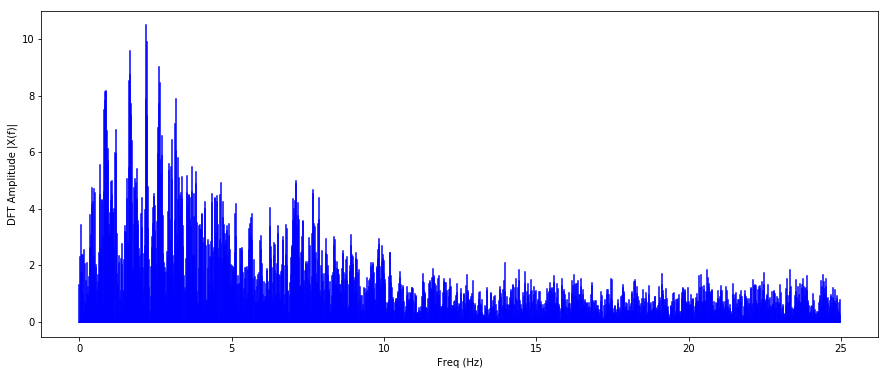

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import sampled signal
dat = impDat2('acce.csv')

# compute DFT
N,dt,X,f = customDFT(dat)

# plot DFT amplitude vs. frquency
plt.figure(figsize = (15, 6))
plt.stem(f[0:N], abs(X[0:N]), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(f)|')
plt.show()